In [209]:
import requests
import time
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


In [183]:
with open('API_key.txt') as f:
    api_key = f.read()

In [ ]:
API_KEY = api_key
BASE_URL = 'http://quickstats.nass.usda.gov/api/api_GET/'
OUTPUT_DIR = 'corn_yield_csv'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Select years for collection
START_YEAR = 1910
END_YEAR = 2024

for year in range(START_YEAR, END_YEAR + 1):
    params = {
        'key': API_KEY,
        'commodity_desc': 'CORN',
        'statisticcat_desc': 'YIELD',
        'unit_desc': 'BU / ACRE',
        'agg_level_desc': 'COUNTY',
        'year': year,
        'format': 'JSON'
    }

    try:
        print(f"Downloading data for year {year}...")
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()
        data = response.json()

        records = data.get('data', [])
        if not records:
            print(f"No data for {year}, next.")
            continue

        df = pd.DataFrame(records)

        # Salva CSV per l'anno
        csv_path = os.path.join(OUTPUT_DIR, f"corn_yield_{year}_county.csv")
        df.to_csv(csv_path, index=False)
        print(f"Saved {csv_path} with {len(df)} record.")
        time.sleep(3)  

    except requests.exceptions.RequestException as e:
        print(f"Error for year {year}: {e}")
        time.sleep(5)

In [ ]:
INPUT_DIR = 'corn_yield_csv'
OUTPUT_FILE = 'corn_yield_all_years_county.csv'

files = [os.path.join(INPUT_DIR, f) for f in os.listdir(INPUT_DIR) if f.endswith('.csv')]
dfs = []

for file in sorted(files):
    print(f"Loading {file}...")
    df = pd.read_csv(file)

    # clean the 'Value' column
    def clean_value(val):
        try:
            return float(str(val).replace(",", ""))
        except:
            return None
    df['Value'] = df['Value'].apply(clean_value)

    dfs.append(df)

if dfs:
    full_df = pd.concat(dfs, ignore_index=True)
    full_df.to_csv(OUTPUT_FILE, index=False)
    print(f"Dataset complete saved in '{OUTPUT_FILE}'.")
else:
    print("There are no files to assemble")

Loading corn_yield_csv\corn_yield_1910_county.csv...
Loading corn_yield_csv\corn_yield_1911_county.csv...
Loading corn_yield_csv\corn_yield_1912_county.csv...
Loading corn_yield_csv\corn_yield_1913_county.csv...
Loading corn_yield_csv\corn_yield_1914_county.csv...
Loading corn_yield_csv\corn_yield_1915_county.csv...
Loading corn_yield_csv\corn_yield_1916_county.csv...
Loading corn_yield_csv\corn_yield_1917_county.csv...
Loading corn_yield_csv\corn_yield_1918_county.csv...
Loading corn_yield_csv\corn_yield_1919_county.csv...
Loading corn_yield_csv\corn_yield_1920_county.csv...
Loading corn_yield_csv\corn_yield_1921_county.csv...
Loading corn_yield_csv\corn_yield_1922_county.csv...
Loading corn_yield_csv\corn_yield_1923_county.csv...
Loading corn_yield_csv\corn_yield_1924_county.csv...
Loading corn_yield_csv\corn_yield_1925_county.csv...
Loading corn_yield_csv\corn_yield_1926_county.csv...
Loading corn_yield_csv\corn_yield_1927_county.csv...
Loading corn_yield_csv\corn_yield_1928_county.

In [311]:
df = pd.read_csv('corn_yield_all_years_county.csv')

In [312]:
df.describe()

,region_desc,state_fips_code,country_code,state_ansi,week_ending,county_code,county_ansi,congr_district_code,end_code,begin_code,Value,watershed_desc,watershed_code,CV (%),year,zip_5,asd_code
count,0.00,"221,557.00","221,557.00","221,557.00",0.00,"221,557.00","213,879.00",0.00,"221,557.00","221,557.00","221,557.00",0.00,"221,557.00","7,506.00","221,557.00",0.00,"221,557.00"
mean,NaN,30.09,"9,000.00",30.09,NaN,124.45,93.09,NaN,0.00,0.00,81.04,NaN,0.00,5.56,"1,978.09",NaN,49.89
std,NaN,13.26,0.00,13.26,NaN,179.48,70.65,NaN,0.00,0.00,48.96,NaN,0.00,4.51,25.60,NaN,25.50
min,NaN,1.00,"9,000.00",1.00,NaN,1.00,1.00,NaN,0.00,0.00,0.00,NaN,0.00,0.50,"1,910.00",NaN,10.00
25%,NaN,20.00,"9,000.00",20.00,NaN,41.00,39.00,NaN,0.00,0.00,40.00,NaN,0.00,2.70,"1,960.00",NaN,30.00
50%,NaN,29.00,"9,000.00",29.00,NaN,87.00,83.00,NaN,0.00,0.00,73.60,NaN,0.00,4.10,"1,980.00",NaN,50.00
75%,NaN,39.00,"9,000.00",39.00,NaN,139.00,133.00,NaN,0.00,0.00,114.60,NaN,0.00,6.90,"1,998.00",NaN,70.00
max,NaN,56.00,"9,000.00",56.00,NaN,998.00,810.00,NaN,0.00,0.00,296.30,NaN,0.00,63.40,"2,024.00",NaN,99.00


In [313]:
df.columns

Index(['source_desc', 'region_desc', 'group_desc', 'agg_level_desc',
       'state_name', 'country_name', 'statisticcat_desc', 'domaincat_desc',
       'state_fips_code', 'country_code', 'sector_desc', 'state_ansi',
       'week_ending', 'county_code', 'prodn_practice_desc', 'county_ansi',
       'reference_period_desc', 'congr_district_code', 'unit_desc', 'end_code',
       'asd_desc', 'load_time', 'begin_code', 'Value', 'domain_desc',
       'util_practice_desc', 'watershed_desc', 'short_desc', 'watershed_code',
       'class_desc', 'commodity_desc', 'freq_desc', 'county_name', 'CV (%)',
       'state_alpha', 'location_desc', 'year', 'zip_5', 'asd_code'],
      dtype='object')

In [314]:
interest_columns = ['year','country_name','state_name','county_name','Value']

In [315]:
df = df.loc[:, interest_columns]

In [316]:
df.isna().sum()

year            0
country_name    0
state_name      0
county_name     0
Value           0
dtype: int64

In [317]:
# Groupby for state and year
state_df = full_df.groupby(['year', 'state_name'])['Value'].mean().reset_index()

# For national average
national_df = full_df.groupby(['year'])['Value'].mean().reset_index()

In [318]:
df.head()

,year,country_name,state_name,county_name,Value
0,1910,UNITED STATES,NEBRASKA,BANNER,14.40
1,1910,UNITED STATES,NEBRASKA,BOX BUTTE,16.00
2,1910,UNITED STATES,NEBRASKA,CHEYENNE,9.60
3,1910,UNITED STATES,NEBRASKA,DAWES,16.40
4,1910,UNITED STATES,NEBRASKA,DEUEL,17.50


In [319]:
df['state_name'].unique()

array(['NEBRASKA', 'OHIO', 'MISSOURI', 'NORTH DAKOTA', 'MINNESOTA',
       'SOUTH DAKOTA', 'ILLINOIS', 'NORTH CAROLINA', 'IOWA',
       'WEST VIRGINIA', 'DELAWARE', 'MARYLAND', 'WISCONSIN', 'INDIANA',
       'KENTUCKY', 'OKLAHOMA', 'ALABAMA', 'WASHINGTON', 'MICHIGAN',
       'MONTANA', 'SOUTH CAROLINA', 'MISSISSIPPI', 'NEW JERSEY',
       'GEORGIA', 'TENNESSEE', 'WYOMING', 'NEW MEXICO', 'OREGON',
       'KANSAS', 'VIRGINIA', 'CALIFORNIA', 'LOUISIANA', 'PENNSYLVANIA',
       'ARKANSAS', 'FLORIDA', 'COLORADO', 'ARIZONA', 'TEXAS', 'IDAHO',
       'NEW YORK', 'UTAH'], dtype=object)

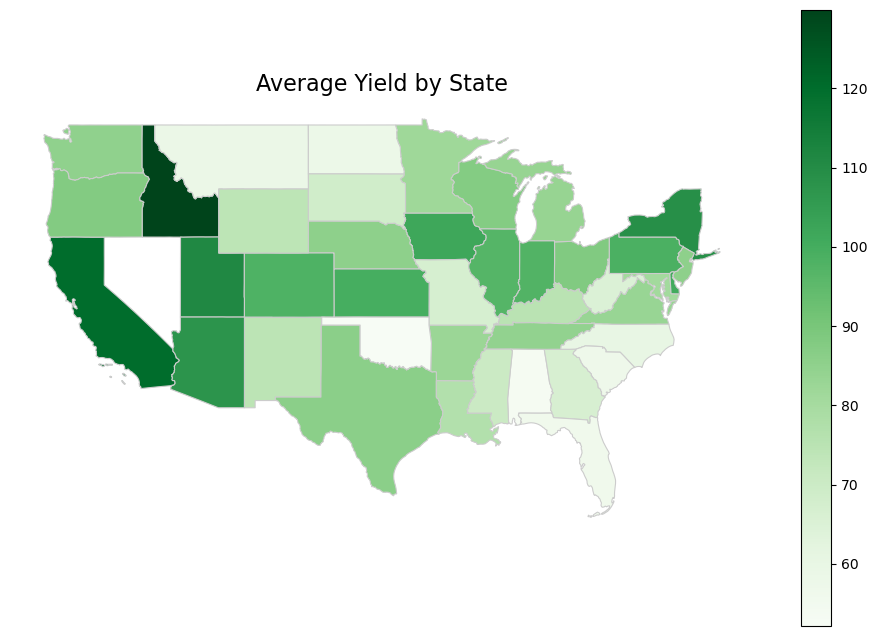

In [320]:
# Group by state to get average yield across all years
state_avg_yield = df.groupby('state_name')['Value'].mean().reset_index()

# Load US state shapefile (download from Census if needed)
states = gpd.read_file("cb_2018_us_state_20m.zip")

# Ensure consistent casing for merge
states['NAME'] = states['NAME'].str.upper()
state_avg_yield['state_name'] = state_avg_yield['state_name'].str.upper()

# Merge data
merged = states.merge(state_avg_yield, left_on='NAME', right_on='state_name')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(column='Value', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
ax.set_title('Average Yield by State', fontsize=16)
ax.axis('off')
plt.show()

In [321]:
df['Value'].describe()

count   221,557.00
mean         81.04
std          48.96
min           0.00
25%          40.00
50%          73.60
75%         114.60
max         296.30
Name: Value, dtype: float64

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


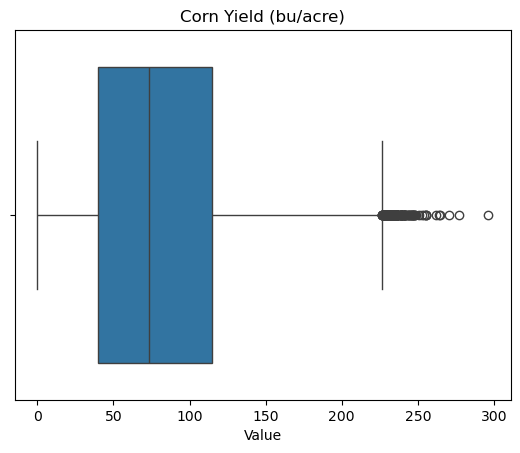

In [322]:
sns.boxplot(df['Value'], orient='h')
plt.title('Corn Yield (bu/acre)')
plt.show()

In [323]:
hist_wx_df = pd.read_parquet('take_home_exam/hist_wx_df.parquet')

In [324]:
hist_wx_df.head()

,aoi_id,date,tmax,tmin,precip,swvl1,swvl2,adm2_name,adm1_name
0,USA.14.100_1,2000-01-01,9.15,-0.30,0.00,0.33,0.32,Will,Illinois
1,USA.14.100_1,2000-01-02,16.08,4.77,0.00,0.34,0.32,Will,Illinois
2,USA.14.100_1,2000-01-03,9.56,1.65,0.47,0.34,0.32,Will,Illinois
3,USA.14.100_1,2000-01-04,3.09,-3.19,1.18,0.38,0.34,Will,Illinois
4,USA.14.100_1,2000-01-05,-1.60,-8.90,0.00,0.35,0.34,Will,Illinois


In [325]:
hist_wx_df.corr(numeric_only=True)

,tmax,tmin,precip,swvl1,swvl2
tmax,1.00,0.95,0.11,-0.34,-0.31
tmin,0.95,1.00,0.18,-0.28,-0.26
precip,0.11,0.18,1.00,0.18,0.11
swvl1,-0.34,-0.28,0.18,1.00,0.95
swvl2,-0.31,-0.26,0.11,0.95,1.00


In [326]:
hist_wx_df.describe().round(2)

,date,tmax,tmin,precip,swvl1,swvl2
count,8527402,"8,527,402.00","8,527,402.00","8,527,402.00","8,527,402.00","8,527,402.00"
mean,2012-03-02 03:27:13.931177984,16.46,6.88,2.36,0.32,0.32
min,2000-01-01 00:00:00,-32.29,-41.80,0.00,0.05,0.06
25%,2006-02-01 00:00:00,7.55,-1.34,0.00,0.27,0.26
50%,2012-03-03 00:00:00,17.97,7.70,0.00,0.34,0.33
75%,2018-04-02 00:00:00,26.25,16.38,1.50,0.38,0.38
max,2024-04-30 00:00:00,44.19,31.56,224.63,0.63,0.63
std,NaN,11.63,11.14,6.34,0.08,0.08


In [327]:
hist_wx_df.isnull().sum()

aoi_id       0
date         0
tmax         0
tmin         0
precip       0
swvl1        0
swvl2        0
adm2_name    0
adm1_name    0
dtype: int64

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='tmax'>

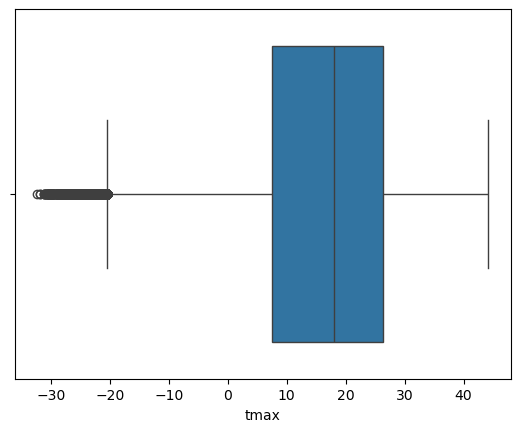

In [328]:
sns.boxplot(hist_wx_df['tmax'], orient='h')

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='tmin'>

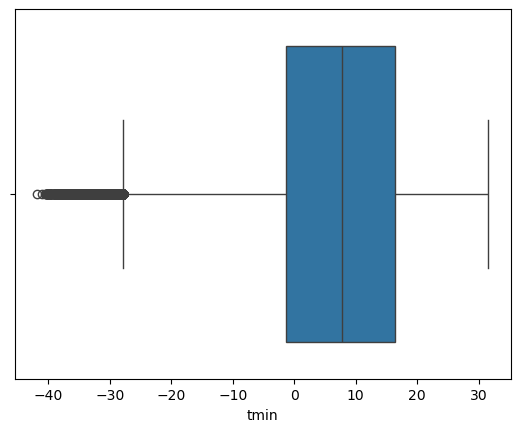

In [329]:
sns.boxplot(hist_wx_df['tmin'], orient='h')

The box plot you show clearly highlights a common problem in precipitation data:
the presence of very high outliers and a strongly asymmetrical (skewed) distribution because probabily there a lot of days without rain.

c:\ProgramData\anaconda3\envs\env_master\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='precip'>

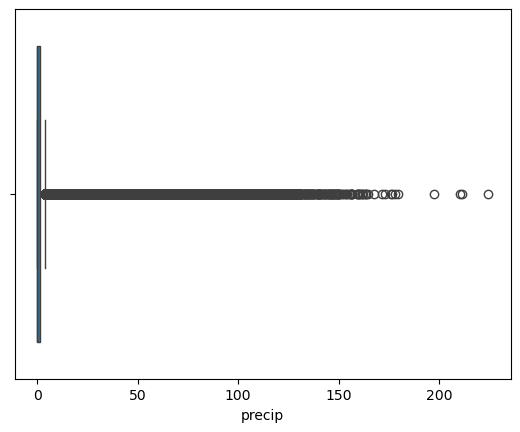

In [330]:
sns.boxplot(hist_wx_df['precip'], orient='h')

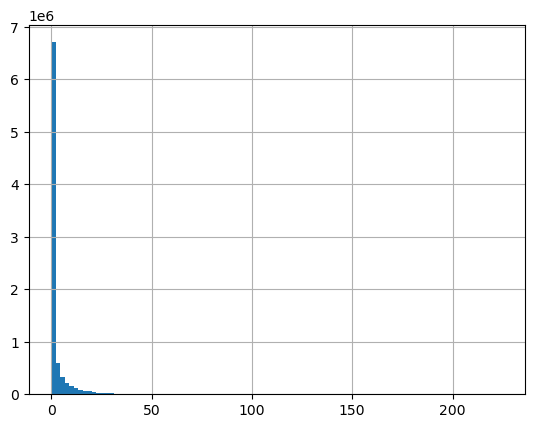

In [331]:
hist_wx_df['precip'].hist(bins=100)
plt.show()

In [332]:
hist_wx_df['rain_flag'] = pd.cut(
    hist_wx_df['precip'],
    bins=[-0.1, 0, 50, float('inf')],
    labels=[0, 1, 2],
    right=True
).astype(int)

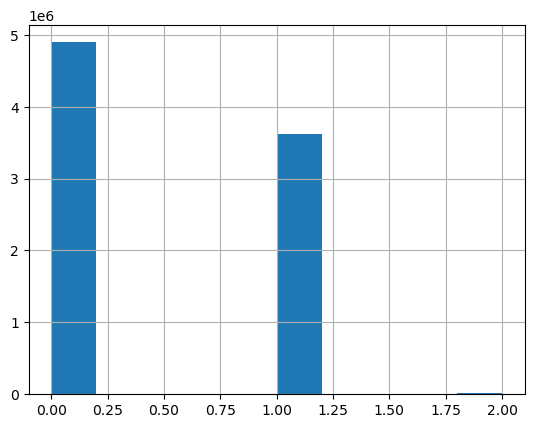

In [333]:
hist_wx_df['rain_flag'].hist()
plt.show()

In [334]:
ts = df.set_index('year')

In [335]:
ts_yield = pd.Series(ts['Value'])

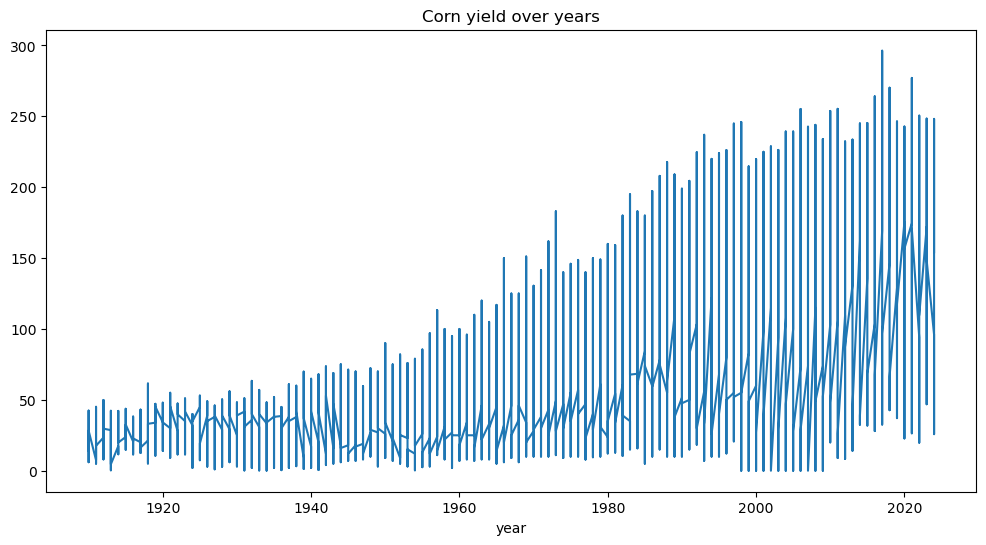

In [336]:
ts_yield.plot(legend=False, title='Corn yield over years', figsize=(12, 6))
plt.show()

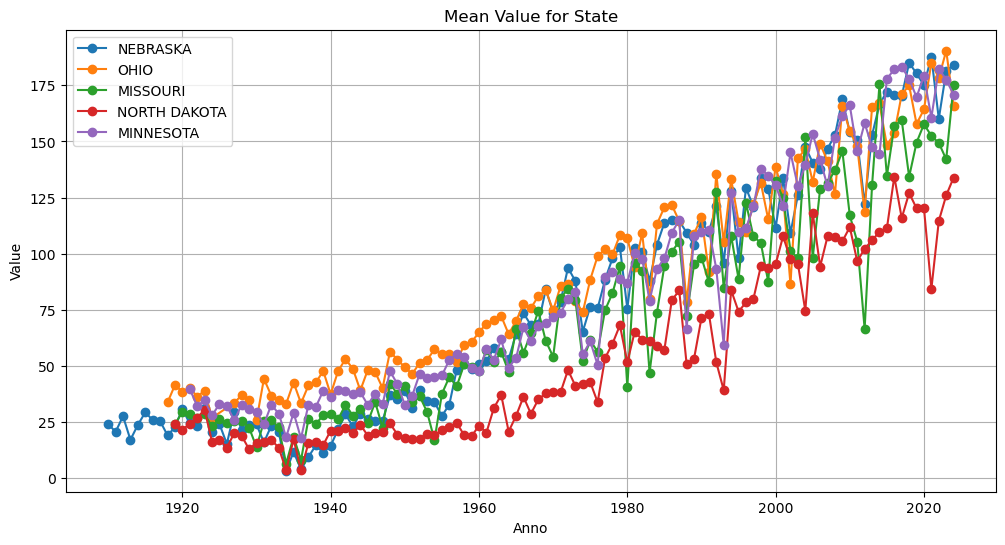

In [337]:
# Series for state
state_time_series = df.groupby(['year', 'state_name'])['Value'].mean().reset_index()

# Graph for the firts 10 states
states_to_plot = state_time_series['state_name'].unique()[:5]  

plt.figure(figsize=(12, 6))
for state in states_to_plot:
    data = state_time_series[state_time_series['state_name'] == state]
    plt.plot(data['year'], data['Value'], marker='o', label=state)

plt.title("Mean Value for State")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

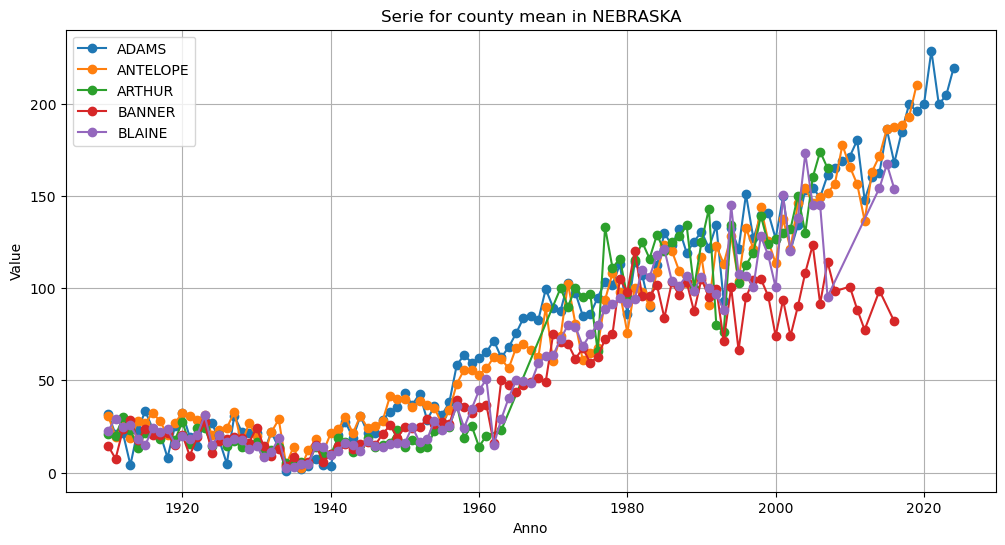

In [338]:
# Serie for county in a specific state
state_example = 'NEBRASKA'
county_time_series = df[df['state_name'] == state_example].groupby(['year', 'county_name'])['Value'].mean().reset_index()

# Selezioniamo alcuni county per il grafico (massimo 5)
counties_to_plot = county_time_series['county_name'].unique()[:5]

plt.figure(figsize=(12, 6))
for county in counties_to_plot:
    data = county_time_series[county_time_series['county_name'] == county]
    plt.plot(data['year'], data['Value'], marker='o', label=county)

plt.title(f"Serie for county mean in {state_example}")
plt.xlabel("Anno")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

## Timeseries

In [386]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [387]:
ts = national_df.set_index('year')
ts_yield = pd.Series(ts['Value'])

In [388]:
ts_yield.isna().sum()

0

In [389]:
ts_yield

year
1910    24.15
1911    20.63
1912    27.59
1913    17.11
1914    23.72
        ...  
2020   155.03
2021   163.25
2022   153.51
2023   165.17
2024   155.01
Name: Value, Length: 115, dtype: float64

In [390]:
type(ts_yield)

pandas.core.series.Series

In [391]:
ts_yield.index

Index([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       ...
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='year', length=115)

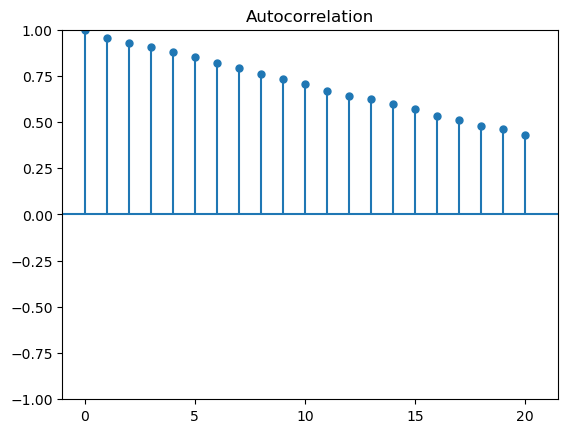

In [392]:
plot_acf(ts_yield.values[11:], lags=20, alpha=1)
plt.show()

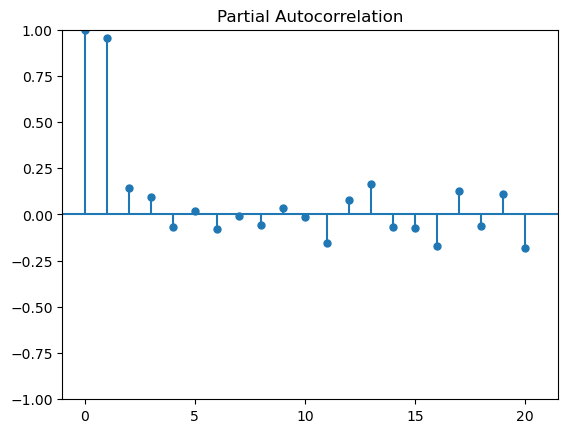

In [393]:
plot_pacf(ts_yield.values[11:], lags=20, alpha=1)
plt.show()

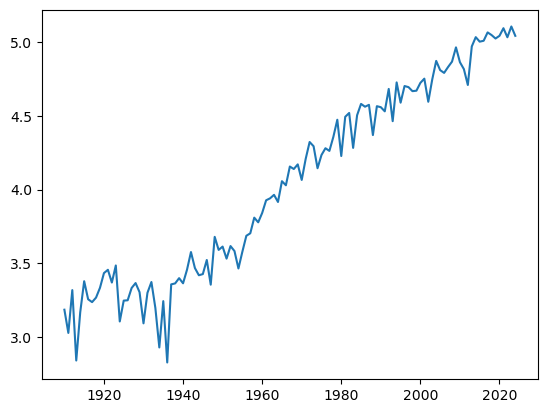

In [394]:
ts_log = pd.Series(np.log(ts_yield))
plt.plot(ts_log)
plt.show()

<Axes: xlabel='year'>

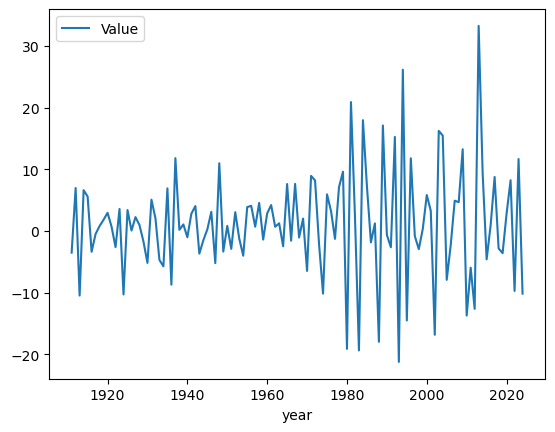

In [395]:
trend = ts.diff() 
trend.plot()


In [396]:
# Convert the index to datetime
ts_yield.index = pd.to_datetime(ts_yield.index,  format='%Y')

# Check the result
print(ts_yield)
print(type(ts_yield.index))

year
1910-01-01    24.15
1911-01-01    20.63
1912-01-01    27.59
1913-01-01    17.11
1914-01-01    23.72
              ...  
2020-01-01   155.03
2021-01-01   163.25
2022-01-01   153.51
2023-01-01   165.17
2024-01-01   155.01
Name: Value, Length: 115, dtype: float64
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [399]:
# Check for missing data:
print(ts_yield.isna().sum())

0


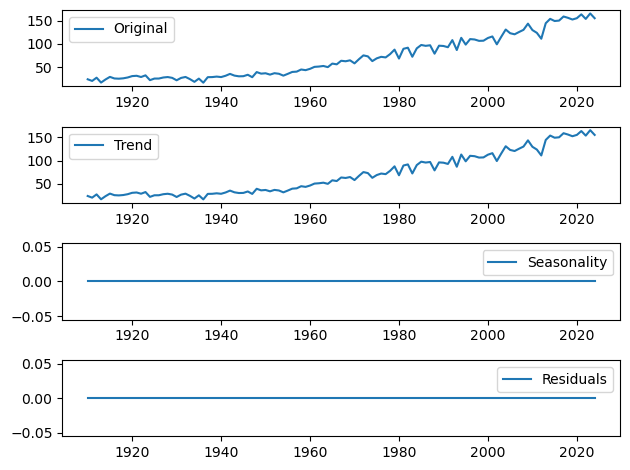

In [401]:
decomposition = seasonal_decompose(ts_yield, period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_yield, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()